<a href="https://colab.research.google.com/github/R-WATT24/ELECTRICITY-THEFT-DETECTION/blob/main/ELECTRICITY_THEFT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data set.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, 1/1/2014 to FLAG
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


In [ ]:
df.head()

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,CONS_NO,FLAG
0,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.02,0.06,0.58,0.89,0.35,0.38,0.70,0.25,0387DD8A07E07FDA6271170F86AD9151,1
1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,17.13,14.32,16.37,26.33,19.06,17.38,13.94,14.14,01D6177B5D4FFE0CABA9EF17DAFC2B84,1
2,0.0,0.0,0.00,0.0,0.0,4.98,9.87,11.29,13.44,11.34,...,NaN,1.43,2.22,2.41,3.48,2.89,1.88,1.16,4B75AC4F2D8434CFF62DB64D0BB43103,1
3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,20.98,18.47,15.50,14.80,19.28,16.10,17.51,16.67,B32AC8CC6D5D805AC053557AB05F5343,1
4,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.61,1.33,0.55,1.62,1.53,2.10,1.16,2.13,EDFC78B07BA2908B3395C4EB2304665E,1


In [ ]:
# Data Inspection
print(df.tail())

# Basic statistics
display(df.describe())

       1/1/2014  1/2/2014  1/3/2014  1/4/2014  1/5/2014  1/6/2014  1/7/2014  \
42367       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
42368       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
42369       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
42370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
42371       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       1/8/2014  1/9/2014  1/10/2014  ...  10/24/2016  10/25/2016  10/26/2016  \
42367       NaN       NaN        NaN  ...        3.79        6.02        2.52   
42368       NaN       NaN        NaN  ...       10.65        9.95       10.83   
42369       NaN       NaN        NaN  ...        0.39        0.86        0.60   
42370       NaN       NaN        NaN  ...        2.75        3.01        2.99   
42371       NaN       NaN        NaN  ...        8.35        8.68        6.39   

       10/27/2016  10/28/2016  10/29/2

,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,1/10/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
count,25870.000000,25873.000000,25872.000000,25874.000000,25874.000000,25878.000000,25879.000000,25907.000000,25907.000000,25912.000000,...,41824.000000,41820.000000,41665.000000,41623.000000,41397.000000,41443.000000,41637.000000,41634.000000,41569.000000,42372.000000
mean,7.168735,7.057237,6.704972,7.237638,7.394550,6.939544,7.271432,6.862706,6.956579,6.954202,...,9.692272,8.503682,9.032455,9.396710,9.878270,9.934374,8.845107,8.355138,8.224294,0.085316
std,34.131237,30.086443,31.223720,49.508191,41.464202,37.583286,64.114745,34.842458,39.684055,40.017856,...,75.590148,81.278000,79.378526,80.896258,92.312243,88.382736,84.201505,78.702362,70.861576,0.279354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.810000,0.750000,0.790000,0.810000,0.840000,0.870000,0.790000,0.770000,0.770000,0.000000
50%,3.310000,3.400000,3.110000,3.340000,3.560000,3.325000,3.120000,3.210000,3.120000,2.870000,...,4.780000,4.290000,4.420000,4.530000,4.650000,4.710000,4.450000,4.390000,4.290000,0.000000
75%,8.910000,8.570000,8.110000,8.320000,8.880000,8.290000,8.090000,8.120000,8.210000,8.170000,...,9.662500,8.400000,8.680000,9.010000,9.350000,9.510000,8.750000,8.490000,8.110000,0.000000
max,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,3966.000000,...,11100.000000,13560.000000,11940.000000,12480.000000,15180.000000,14970.000000,14100.000000,12480.000000,9990.000000,1.000000


In [ ]:
# Check for missing values
print("Number of missing values in each column :",df.isnull().sum())
print("\nTotal number of missing values :",df.isnull().sum().sum())

Number of missing values in each column : 1/1/2014      16502
1/2/2014      16499
1/3/2014      16500
1/4/2014      16498
1/5/2014      16498
              ...  
10/29/2016      735
10/30/2016      738
10/31/2016      803
CONS_NO           0
FLAG              0
Length: 1036, dtype: int64

Total number of missing values : 11233528


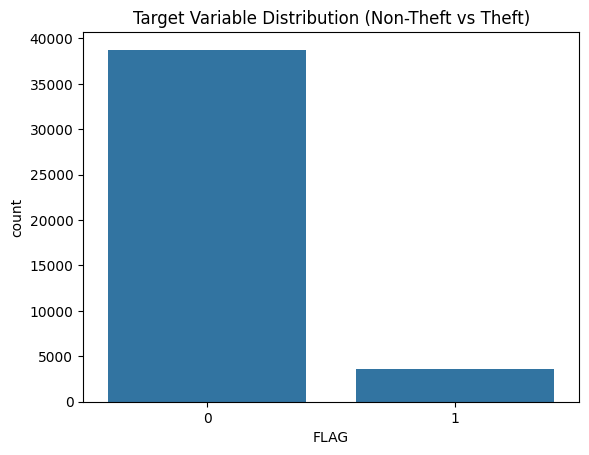

Class distribution :
FLAG
0    38757
1     3615
Name: count, dtype: int64
Class distribution (in %):
FLAG
0    91.468423
1     8.531577
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Explore Target Distribution
sns.countplot(x=df["FLAG"])
plt.title("Target Variable Distribution (Non-Theft vs Theft)")
plt.show()
print("Class distribution :")
print(df["FLAG"].value_counts())
print("Class distribution (in %):")
print(df["FLAG"].value_counts(normalize=True) * 100)

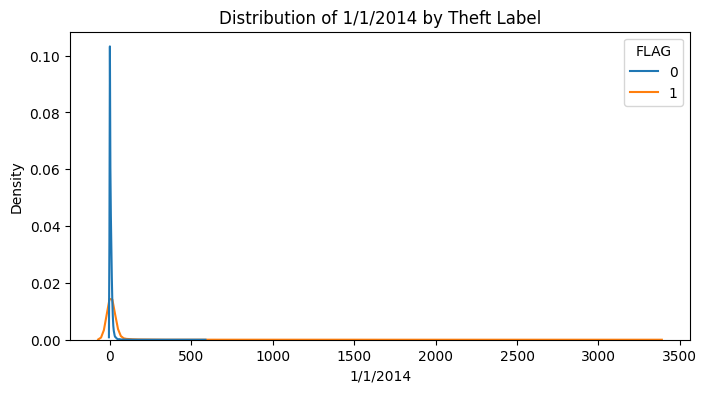

In [ ]:
# Explore Feature Distributions
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
col=numeric_cols[0]
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x=col, hue="FLAG", common_norm=False)
plt.title(f"Distribution of {col} by Theft Label")
plt.show()

/tmp/ipython-input-213075174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")


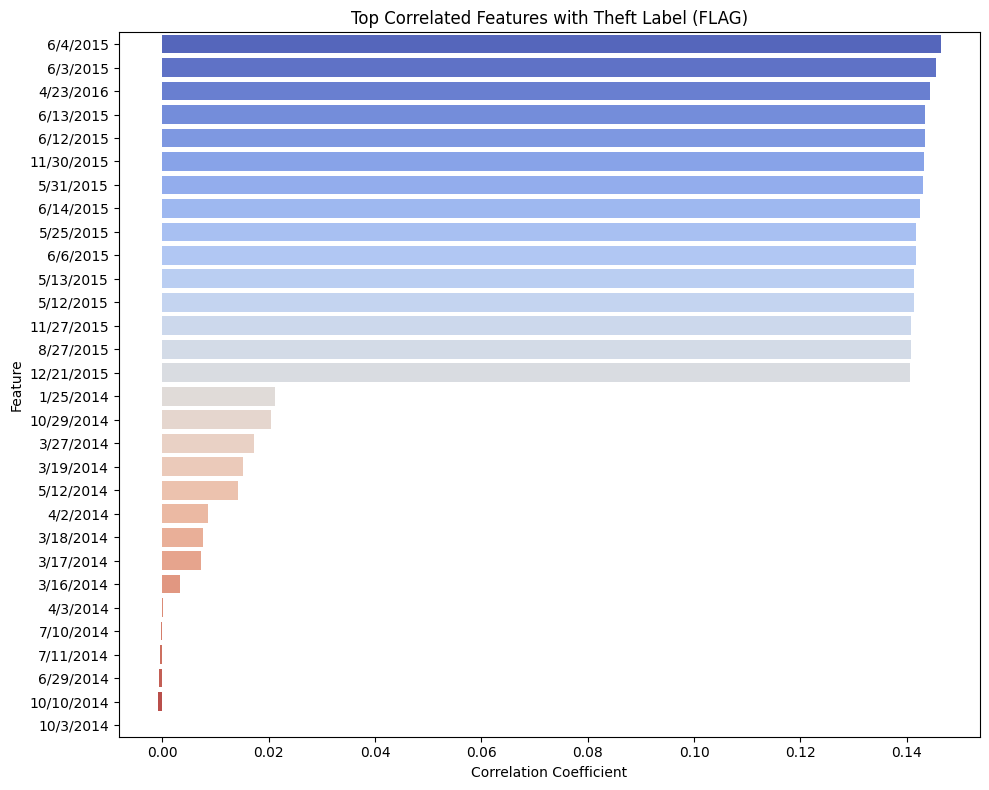

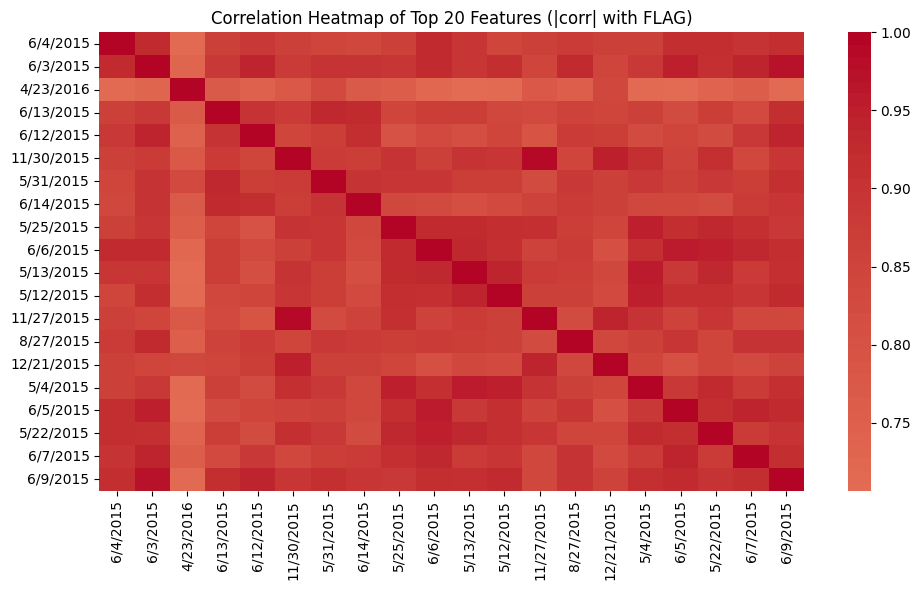

In [ ]:
# Correlation with Target (FLAG)
corr_with_target = df[numeric_cols].corr()['FLAG'].drop('FLAG').sort_values(ascending=False)
# Plot top 25 most positively and negatively correlated features
top_corr_features = pd.concat([corr_with_target.head(15), corr_with_target.tail(15)])

plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")
plt.title("Top Correlated Features with Theft Label (FLAG)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Heatmap for only Top Features
top_features = corr_with_target.abs().sort_values(ascending=False).head(20).index
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features].corr(), cmap='coolwarm', annot=False, center=0)
plt.title("Correlation Heatmap of Top 20 Features (|corr| with FLAG)")
plt.tight_layout()
plt.show()

In [ ]:
#Handle Missing Values
# Separate metadata and time-series columns
meta_cols = ['CONS_NO', 'FLAG']
time_cols = [col for col in df.columns if col not in meta_cols]
# Check overall missing percentage
missing_pct = df[time_cols].isnull().mean().mean() * 100
print(f"Average missing rate across all time columns: {missing_pct:.2f}%")
# Strategy 1: Fill missing daily readings per customer with forward/backward fill
df[time_cols] = df[time_cols].transpose().fillna(method='ffill').fillna(method='bfill').transpose()

Average missing rate across all time columns: 25.64%


/tmp/ipython-input-3355262245.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[time_cols] = df[time_cols].transpose().fillna(method='ffill').fillna(method='bfill').transpose()


In [ ]:
df.isnull().sum()
df.isnull().sum().sum()

np.int64(5170)

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
print(" Final remaining missing values:", df.isnull().sum().sum())

 Final remaining missing values: 0


In [ ]:
# Normalize Numeric Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Identify numeric columns (exclude ID, target, or categorical features)
exclude_cols = ['CONS_NO', 'FLAG']  # adjust if you have more metadata
numeric_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ['int64', 'float64']]
print(f"Number of numeric features to scale: {len(numeric_cols)}")

# StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# Sanity check
print("\nNormalization complete.")
print("Mean of first few columns after scaling:")
print(df[numeric_cols].mean().head())
print("\nStandard deviation of first few columns after scaling:")
print(df[numeric_cols].std().head())

Number of numeric features to scale: 1034

Normalization complete.
Mean of first few columns after scaling:
1/1/2014    6.917277e-18
1/2/2014   -1.001957e-17
1/3/2014   -4.611518e-18
1/4/2014   -1.342581e-17
1/5/2014    4.297097e-18
dtype: float64

Standard deviation of first few columns after scaling:
1/1/2014    1.000012
1/2/2014    1.000012
1/3/2014    1.000012
1/4/2014    1.000012
1/5/2014    1.000012
dtype: float64


In [ ]:
# Save Cleaned Data
# Save the full cleaned and normalized dataset
df.to_csv("cleaned_data.csv")
print(f" Full cleaned, normalized dataset saved successfully at:\n /content/drive/MyDrive/Electricity_Theft_Detection/Data/cleaned_data.csv")


 Full cleaned, normalized dataset saved successfully at:
 /content/drive/MyDrive/Electricity_Theft_Detection/Data/cleaned_data.csv


In [ ]:
from scipy.stats import skew, kurtosis
# Load the cleaned, normalized dataset
df_cleaned = pd.read_csv("cleaned_data.csv")
print("Cleaned data loaded successfully")
print("Shape:", df.shape)

Cleaned data loaded successfully
Shape: (42372, 1036)


In [ ]:
df_cleaned.head()

,Unnamed: 0,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,...,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,CONS_NO,FLAG
0,0,-0.117242,-0.118225,-0.114403,-0.109316,-0.115274,-0.113486,-0.100880,-0.114276,-0.112580,...,-0.105156,-0.113796,-0.109709,-0.098338,-0.109504,-0.101580,-0.098008,-0.113223,0387DD8A07E07FDA6271170F86AD9151,1
1,1,-0.117242,-0.118225,-0.114549,-0.109316,-0.115274,-0.113486,-0.100880,-0.114276,-0.112580,...,0.105746,0.066461,0.086278,0.179423,0.103666,0.101176,0.070832,0.083402,01D6177B5D4FFE0CABA9EF17DAFC2B84,1
2,2,-0.117242,-0.118225,-0.114549,-0.109316,-0.115274,-0.042960,0.020304,0.047578,0.075874,...,-0.025405,-0.096479,-0.089353,-0.081742,-0.073843,-0.071643,-0.082961,-0.100341,4B75AC4F2D8434CFF62DB64D0BB43103,1
3,3,-0.117242,-0.118225,-0.114549,-0.109316,-0.115274,-0.113486,-0.100880,-0.114276,-0.112580,...,0.153202,0.118920,0.075479,0.053535,0.106172,0.085910,0.116358,0.119216,B32AC8CC6D5D805AC053557AB05F5343,1
4,4,-0.117242,-0.118225,-0.114549,-0.109316,-0.115274,-0.113486,-0.100880,-0.114276,-0.112580,...,-0.097883,-0.097743,-0.110081,-0.090368,-0.096060,-0.081065,-0.092142,-0.086610,EDFC78B07BA2908B3395C4EB2304665E,1


In [ ]:
# Clean Minor Artifacts
# Drop unwanted index column if present
if 'Unnamed: 0' in df_cleaned.columns:
    df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)
    print("Dropped 'Unnamed: 0' column")

Dropped 'Unnamed: 0' column


In [ ]:
# Check uniqueness of consumer IDs
unique_ids = df['CONS_NO'].nunique()
print(f"Total consumers: {len(df)}, Unique consumer IDs: {unique_ids}")

# Sanity check target distribution
print("\nTheft (FLAG) distribution:")
print(df['FLAG'].value_counts(normalize=True).round(3))

Total consumers: 42372, Unique consumer IDs: 42372

Theft (FLAG) distribution:
FLAG
0    0.915
1    0.085
Name: proportion, dtype: float64


In [ ]:
# Time-Based Feature Engineering
exclude_cols = ['CONS_NO', 'FLAG']
time_cols = [col for col in df_cleaned.columns if col not in exclude_cols]

# Create a new DataFrame for engineered features
features = pd.DataFrame()
features['CONS_NO'] = df_cleaned['CONS_NO']

In [ ]:
# Basic statistical aggregations
features['mean_usage'] = df_cleaned[time_cols].mean(axis=1)
features['std_usage'] = df_cleaned[time_cols].std(axis=1)
features['min_usage'] = df_cleaned[time_cols].min(axis=1)
features['max_usage'] = df_cleaned[time_cols].max(axis=1)
features['median_usage'] = df_cleaned[time_cols].median(axis=1)

# Higher-order stats
features['skew_usage'] = df_cleaned[time_cols].skew(axis=1)
features['kurtosis_usage'] = df_cleaned[time_cols].kurtosis(axis=1)

# Derived ratios
features['range_usage'] = features['max_usage'] - features['min_usage']
features['cv_usage'] = features['std_usage'] / (features['mean_usage'] + 1e-9)

# Attach target back
features['FLAG'] = df_cleaned['FLAG']
print("Statistical feature engineering complete.")
print("New feature set shape:", features.shape)
display(features.head())

# Domain-Specific Features
domain_feats = pd.DataFrame()
domain_feats['CONS_NO'] = df_cleaned['CONS_NO']

# Percentage of days with very low consumption (below 10th percentile per user)
low_threshold = np.percentile(df_cleaned[time_cols], 10)
domain_feats['low_usage_days_pct'] = (df_cleaned[time_cols] < low_threshold).sum(axis=1) / len(time_cols)

# Percentage of days with very high consumption (above 90th percentile)
high_threshold = np.percentile(df_cleaned[time_cols], 90)
domain_feats['high_usage_days_pct'] = (df_cleaned[time_cols] > high_threshold).sum(axis=1) / len(time_cols)

# Ratio of high to low usage days (avoid division by zero)
domain_feats['high_low_ratio'] = domain_feats['high_usage_days_pct'] / (domain_feats['low_usage_days_pct'] + 1e-9)

# Consumption volatility: rolling 7-day mean std (simplified proxy)
rolling_std = df_cleaned[time_cols].rolling(window=7, axis=1).std().mean(axis=1)
domain_feats['rolling_7day_std'] = rolling_std

# Attach target
domain_feats['FLAG'] = df_cleaned['FLAG']
print("Domain-specific feature engineering complete.")
print("New domain feature set shape:", domain_feats.shape)
display(domain_feats.head())

Statistical feature engineering complete.
New feature set shape: (42372, 11)


,CONS_NO,mean_usage,std_usage,min_usage,max_usage,median_usage,skew_usage,kurtosis_usage,range_usage,cv_usage,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,-0.114055,0.055684,-0.315863,0.129517,-0.124192,1.237130,3.772436,0.445380,-0.488216,1
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,-0.076329,0.076180,-0.153828,0.383464,-0.111813,2.067495,4.811380,0.537292,-0.998043,1
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.009313,0.159058,-0.251470,1.070890,-0.029056,2.783605,11.888744,1.322360,17.078918,1
3,B32AC8CC6D5D805AC053557AB05F5343,-0.084598,0.094284,-0.315863,0.300567,-0.122429,1.526288,2.295891,0.616430,-1.114499,1
4,EDFC78B07BA2908B3395C4EB2304665E,1.451543,0.779724,-0.152969,5.741519,1.842982,-0.388052,1.790225,5.894489,0.537169,1


/tmp/ipython-input-1800814737.py:38: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_std = df_cleaned[time_cols].rolling(window=7, axis=1).std().mean(axis=1)


Domain-specific feature engineering complete.
New domain feature set shape: (42372, 6)


,CONS_NO,low_usage_days_pct,high_usage_days_pct,high_low_ratio,rolling_7day_std,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,0.332689,0.003868,0.011628,0.014021,1
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,0.089942,0.035783,0.397849,0.012696,1
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.034816,0.156673,4.500000,0.044264,1
3,B32AC8CC6D5D805AC053557AB05F5343,0.274662,0.065764,0.239437,0.013965,1
4,EDFC78B07BA2908B3395C4EB2304665E,0.004836,0.898453,185.799962,0.159286,1


In [ ]:
# Combine & Save Feature Set
# Merge statistical and domain-specific features on CONS_NO + FLAG
feature_df = pd.merge(features, domain_feats, on=['CONS_NO', 'FLAG'], how='inner')
print("Combined feature set created.")
print("Shape:", feature_df.shape)
display(feature_df.head())

# Save to disk
feature_df.to_csv("feature_engineered.csv", index=False)
print(f"\nFeature-engineered dataset saved successfully at:feature_engineered.csv")

Combined feature set created.
Shape: (42372, 15)


,CONS_NO,mean_usage,std_usage,min_usage,max_usage,median_usage,skew_usage,kurtosis_usage,range_usage,cv_usage,FLAG,low_usage_days_pct,high_usage_days_pct,high_low_ratio,rolling_7day_std
0,0387DD8A07E07FDA6271170F86AD9151,-0.114055,0.055684,-0.315863,0.129517,-0.124192,1.237130,3.772436,0.445380,-0.488216,1,0.332689,0.003868,0.011628,0.014021
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,-0.076329,0.076180,-0.153828,0.383464,-0.111813,2.067495,4.811380,0.537292,-0.998043,1,0.089942,0.035783,0.397849,0.012696
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.009313,0.159058,-0.251470,1.070890,-0.029056,2.783605,11.888744,1.322360,17.078918,1,0.034816,0.156673,4.500000,0.044264
3,B32AC8CC6D5D805AC053557AB05F5343,-0.084598,0.094284,-0.315863,0.300567,-0.122429,1.526288,2.295891,0.616430,-1.114499,1,0.274662,0.065764,0.239437,0.013965
4,EDFC78B07BA2908B3395C4EB2304665E,1.451543,0.779724,-0.152969,5.741519,1.842982,-0.388052,1.790225,5.894489,0.537169,1,0.004836,0.898453,185.799962,0.159286



Feature-engineered dataset saved successfully at:feature_engineered.csv


In [ ]:
# Load the dataset
feature_df = pd.read_csv('feature_engineered.csv')
# Check shape and basic info
print("Loaded feature-engineered data")
print("Shape:", feature_df.shape)
print("\nColumns:", feature_df.columns.tolist())
print("\nDtypes:\n", feature_df.dtypes)

# Target distribution
target_counts = feature_df['FLAG'].value_counts()
target_prop = feature_df['FLAG'].value_counts(normalize=True)
print("\nTarget distribution (counts and proportion):")
print(target_counts)
print(target_prop)

Loaded feature-engineered data
Shape: (42372, 15)

Columns: ['CONS_NO', 'mean_usage', 'std_usage', 'min_usage', 'max_usage', 'median_usage', 'skew_usage', 'kurtosis_usage', 'range_usage', 'cv_usage', 'FLAG', 'low_usage_days_pct', 'high_usage_days_pct', 'high_low_ratio', 'rolling_7day_std']

Dtypes:
 CONS_NO                 object
mean_usage             float64
std_usage              float64
min_usage              float64
max_usage              float64
median_usage           float64
skew_usage             float64
kurtosis_usage         float64
range_usage            float64
cv_usage               float64
FLAG                     int64
low_usage_days_pct     float64
high_usage_days_pct    float64
high_low_ratio         float64
rolling_7day_std       float64
dtype: object

Target distribution (counts and proportion):
FLAG
0    38757
1     3615
Name: count, dtype: int64
FLAG
0    0.914684
1    0.085316
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
# Features and target
X = feature_df.drop(columns=['CONS_NO', 'FLAG'])
y = feature_df['FLAG']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nTrain class distribution:\n", y_train.value_counts(), "\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(), "\n", y_test.value_counts(normalize=True))

# Baseline accuracy if always predicting majority class
baseline_acc = y_train.value_counts(normalize=True).max()
print("\nBaseline accuracy if we always predict majority class:", baseline_acc)

Train shape: (33897, 13) Test shape: (8475, 13)

Train class distribution:
 FLAG
0    31005
1     2892
Name: count, dtype: int64 
 FLAG
0    0.914683
1    0.085317
Name: proportion, dtype: float64

Test class distribution:
 FLAG
0    7752
1     723
Name: count, dtype: int64 
 FLAG
0    0.91469
1    0.08531
Name: proportion, dtype: float64

Baseline accuracy if we always predict majority class: 0.9146827152845385


In [ ]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE only on the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("SMOTE train distribution:", y_train_smote.value_counts().values)

SMOTE train distribution: [31005 31005]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

# Train logistic regression with class weight to handle imbalance
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
lr.fit(X_train, y_train)

# Predictions & evaluation
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[3774 3978]
 [ 158  565]]
              precision    recall  f1-score   support

           0     0.9598    0.4868    0.6460      7752
           1     0.1244    0.7815    0.2146       723

    accuracy                         0.5120      8475
   macro avg     0.5421    0.6342    0.4303      8475
weighted avg     0.8885    0.5120    0.6092      8475



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest with class_weight to handle imbalance
rf = RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_split=5,class_weight='balanced_subsample',random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions & evaluation
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[7712   40]
 [ 680   43]]
              precision    recall  f1-score   support

           0     0.9190    0.9948    0.9554      7752
           1     0.5181    0.0595    0.1067       723

    accuracy                         0.9150      8475
   macro avg     0.7185    0.5272    0.5311      8475
weighted avg     0.8848    0.9150    0.8830      8475



In [ ]:
from xgboost import XGBClassifier

# Compute scale_pos_weight = ratio of majority/minority classes
scale = (y_train == 0).sum() / (y_train == 1).sum()
# Train XGBoost classifier
xgb = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,scale_pos_weight=scale,eval_metric='logloss',random_state=42,n_jobs=-1,tree_method='hist')
xgb.fit(X_train, y_train)

# Predictions & evaluation
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[6198 1554]
 [ 309  414]]
              precision    recall  f1-score   support

           0     0.9525    0.7995    0.8693      7752
           1     0.2104    0.5726    0.3077       723

    accuracy                         0.7802      8475
   macro avg     0.5814    0.6861    0.5885      8475
weighted avg     0.8892    0.7802    0.8214      8475



In [ ]:
from lightgbm import LGBMClassifier

# Compute imbalance ratio for weight tuning
scale = (y_train == 0).sum() / (y_train == 1).sum()
# Train LightGBM classifier
lgb = LGBMClassifier(n_estimators=400,learning_rate=0.05,max_depth=-1,num_leaves=64,subsample=0.8,colsample_bytree=0.8,scale_pos_weight=scale,objective='binary',random_state=42,n_jobs=-1,metric='binary_logloss')
lgb.fit(X_train, y_train)

# Predictions & evaluation
y_pred = lgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[LightGBM] [Info] Number of positive: 2892, number of negative: 31005
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3297
[LightGBM] [Info] Number of data points in the train set: 33897, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085317 -> initscore=-2.372200
[LightGBM] [Info] Start training from score -2.372200
[[6876  876]
 [ 398  325]]
              precision    recall  f1-score   support

           0     0.9453    0.8870    0.9152      7752
           1     0.2706    0.4495    0.3378       723

    accuracy                         0.8497      8475
   macro avg     0.6079    0.6683    0.6265      8475
weighted avg     0.8877    0.8497    0.8660      8475



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Train Decision Tree with imbalance handling
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,           # allow full growth initially
    min_samples_split=5,      # slight regularization
    class_weight='balanced',  # adjust for class imbalance
    random_state=42
)
dt.fit(X_train, y_train)

# Predictions & evaluation
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[7118  634]
 [ 560  163]]
              precision    recall  f1-score   support

           0     0.9271    0.9182    0.9226      7752
           1     0.2045    0.2254    0.2145       723

    accuracy                         0.8591      8475
   macro avg     0.5658    0.5718    0.5685      8475
weighted avg     0.8654    0.8591    0.8622      8475



In [ ]:
import pandas as pd

def check_consumer():
  consumer_number_input = input("Enter the consumer number: ")

  # Load the feature-engineered data
  try:
    feature_df = pd.read_csv('feature_engineered.csv')
    consumer_data = feature_df[feature_df['CONS_NO'] == consumer_number_input]
    if not consumer_data.empty:
        # Get the FLAG value for the consumer
        theft_flag = consumer_data['FLAG'].iloc[0]

        if theft_flag == 1:
            print(f"Consumer {consumer_number_input}: Electricity theft detected !!")
        else:
            print(f"Consumer {consumer_number_input}: NO electricity theft detected.")
    else:
        print(f"Consumer {consumer_number_input} not found in the dataset.")

  except FileNotFoundError:
    print("Error: 'feature_engineered.csv' not found. Please make sure the file exists.")
  except Exception as e:
    print(f"An error occurred: {e}")

check_consumer()

Enter the consumer number: C5E540C4027AB9E9EDB2C8411B95BC04
Consumer C5E540C4027AB9E9EDB2C8411B95BC04: Electricity theft detected.


In [ ]:
display(feature_df.describe())

,mean_usage,std_usage,min_usage,max_usage,median_usage,skew_usage,kurtosis_usage,range_usage,cv_usage,FLAG,low_usage_days_pct,high_usage_days_pct,high_low_ratio,rolling_7day_std
count,4.237200e+04,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,4.237200e+04,42372.000000
mean,3.672445e-17,0.091125,-0.213270,0.717124,-0.009266,0.992208,16.340512,0.930395,-2.275948,0.085316,0.099898,0.100000,5.297720e+07,0.028740
std,8.975856e-01,0.431564,0.082178,5.008894,0.945948,3.319816,89.061804,5.003803,323.620580,0.279354,0.121882,0.213714,1.777323e+08,0.124348
min,-1.257892e-01,0.016177,-0.315863,-0.006914,-0.124751,-4.786786,-1.863534,0.110517,-51705.193454,0.000000,0.000000,0.000000,0.000000e+00,0.004847
25%,-1.011101e-01,0.034849,-0.298132,0.020681,-0.108307,-0.664583,2.045211,0.308949,-0.803686,0.000000,0.001934,0.000000,0.000000e+00,0.012097
50%,-5.220837e-02,0.043543,-0.214396,0.203736,-0.057882,0.478318,4.187625,0.404924,-0.323771,0.000000,0.036750,0.005803,1.875000e-01,0.017253
75%,8.056474e-03,0.072213,-0.148961,0.452795,-0.001607,1.530424,6.614946,0.633620,0.556597,0.000000,0.179884,0.069632,2.199998e+01,0.027160
max,1.405008e+02,40.370623,1.025696,205.810434,151.714890,32.149262,1033.716349,206.126297,8901.890165,1.000000,0.344294,1.000000,1.000000e+09,12.470724


In [ ]:
# Time-Based Feature Engineering for potentially shorter time series
exclude_cols = ['CONS_NO', 'FLAG']
time_cols = [col for col in df_cleaned.columns if col not in exclude_cols]

# Create a new DataFrame for engineered features
features = pd.DataFrame()
features['CONS_NO'] = df_cleaned['CONS_NO']

# Basic statistical aggregations - handle missing values during calculation
features['mean_usage'] = df_cleaned[time_cols].mean(axis=1)
features['std_usage'] = df_cleaned[time_cols].std(axis=1)
features['min_usage'] = df_cleaned[time_cols].min(axis=1)
features['max_usage'] = df_cleaned[time_cols].max(axis=1)
features['median_usage'] = df_cleaned[time_cols].median(axis=1)

# Higher-order stats - handle missing values during calculation
features['skew_usage'] = df_cleaned[time_cols].skew(axis=1)
features['kurtosis_usage'] = df_cleaned[time_cols].kurtosis(axis=1)

# Derived ratios
features['range_usage'] = features['max_usage'] - features['min_usage']
# Add a small epsilon to avoid division by zero, or handle NaNs resulting from division by zero
features['cv_usage'] = features['std_usage'] / (features['mean_usage'] + 1e-9)


# Attach target back
features['FLAG'] = df_cleaned['FLAG']
print("Statistical feature engineering complete.")
print("New feature set shape:", features.shape)
display(features.head())

# Domain-Specific Features - handle missing values during calculation
domain_feats = pd.DataFrame()
domain_feats['CONS_NO'] = df_cleaned['CONS_NO']

# Percentage of days with very low consumption (below 10th percentile per user)
# Calculate percentile only on non-NaN values per row
def low_usage_pct(row):
    valid_data = row.dropna()
    if valid_data.empty:
        return np.nan # Or 0, depending on how you want to represent no data
    low_threshold = np.percentile(valid_data, 10)
    return (valid_data < low_threshold).sum() / len(valid_data)

domain_feats['low_usage_days_pct'] = df_cleaned[time_cols].apply(low_usage_pct, axis=1)

# Percentage of days with very high consumption (above 90th percentile per user)
def high_usage_pct(row):
    valid_data = row.dropna()
    if valid_data.empty:
        return np.nan # Or 0
    high_threshold = np.percentile(valid_data, 90)
    return (valid_data > high_threshold).sum() / len(valid_data)

domain_feats['high_usage_days_pct'] = df_cleaned[time_cols].apply(high_usage_pct, axis=1)

# Ratio of high to low usage days (avoid division by zero or handle resulting NaNs)
# Handle cases where low_usage_days_pct is 0 or NaN
domain_feats['high_low_ratio'] = domain_feats['high_usage_days_pct'] / (domain_feats['low_usage_days_pct'].replace(0, np.nan) + 1e-9)


# Consumption volatility: rolling 7-day mean std (simplified proxy)
# This will still be affected by shorter series lengths, but calculated on available data
rolling_std = df_cleaned[time_cols].rolling(window=7, axis=1).std().mean(axis=1)
domain_feats['rolling_7day_std'] = rolling_std


# Attach target
domain_feats['FLAG'] = df_cleaned['FLAG']
print("Domain-specific feature engineering complete.")
print("New domain feature set shape:", domain_feats.shape)
display(domain_feats.head())

# Combine & Save Feature Set
# Merge statistical and domain-specific features on CONS_NO + FLAG
feature_df = pd.merge(features, domain_feats, on=['CONS_NO', 'FLAG'], how='inner')
print("Combined feature set created.")
print("Shape:", feature_df.shape)
display(feature_df.head())

# Save to disk
feature_df.to_csv("feature_engineered.csv", index=False)
print(f"\nFeature-engineered dataset saved successfully at:feature_engineered.csv")

Statistical feature engineering complete.
New feature set shape: (42372, 11)


,CONS_NO,mean_usage,std_usage,min_usage,max_usage,median_usage,skew_usage,kurtosis_usage,range_usage,cv_usage,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,-0.114055,0.055684,-0.315863,0.129517,-0.124192,1.237130,3.772436,0.445380,-0.488216,1
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,-0.076329,0.076180,-0.153828,0.383464,-0.111813,2.067495,4.811380,0.537292,-0.998043,1
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.009313,0.159058,-0.251470,1.070890,-0.029056,2.783605,11.888744,1.322360,17.078918,1
3,B32AC8CC6D5D805AC053557AB05F5343,-0.084598,0.094284,-0.315863,0.300567,-0.122429,1.526288,2.295891,0.616430,-1.114499,1
4,EDFC78B07BA2908B3395C4EB2304665E,1.451543,0.779724,-0.152969,5.741519,1.842982,-0.388052,1.790225,5.894489,0.537169,1


/tmp/ipython-input-4264471383.py:64: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  rolling_std = df_cleaned[time_cols].rolling(window=7, axis=1).std().mean(axis=1)


Domain-specific feature engineering complete.
New domain feature set shape: (42372, 6)


,CONS_NO,low_usage_days_pct,high_usage_days_pct,high_low_ratio,rolling_7day_std,FLAG
0,0387DD8A07E07FDA6271170F86AD9151,0.10058,0.10058,1.0,0.014021,1
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,0.10058,0.10058,1.0,0.012696,1
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.10058,0.10058,1.0,0.044264,1
3,B32AC8CC6D5D805AC053557AB05F5343,0.10058,0.10058,1.0,0.013965,1
4,EDFC78B07BA2908B3395C4EB2304665E,0.10058,0.10058,1.0,0.159286,1


Combined feature set created.
Shape: (42372, 15)


,CONS_NO,mean_usage,std_usage,min_usage,max_usage,median_usage,skew_usage,kurtosis_usage,range_usage,cv_usage,FLAG,low_usage_days_pct,high_usage_days_pct,high_low_ratio,rolling_7day_std
0,0387DD8A07E07FDA6271170F86AD9151,-0.114055,0.055684,-0.315863,0.129517,-0.124192,1.237130,3.772436,0.445380,-0.488216,1,0.10058,0.10058,1.0,0.014021
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,-0.076329,0.076180,-0.153828,0.383464,-0.111813,2.067495,4.811380,0.537292,-0.998043,1,0.10058,0.10058,1.0,0.012696
2,4B75AC4F2D8434CFF62DB64D0BB43103,0.009313,0.159058,-0.251470,1.070890,-0.029056,2.783605,11.888744,1.322360,17.078918,1,0.10058,0.10058,1.0,0.044264
3,B32AC8CC6D5D805AC053557AB05F5343,-0.084598,0.094284,-0.315863,0.300567,-0.122429,1.526288,2.295891,0.616430,-1.114499,1,0.10058,0.10058,1.0,0.013965
4,EDFC78B07BA2908B3395C4EB2304665E,1.451543,0.779724,-0.152969,5.741519,1.842982,-0.388052,1.790225,5.894489,0.537169,1,0.10058,0.10058,1.0,0.159286



Feature-engineered dataset saved successfully at:feature_engineered.csv


Plotting ROC Curves...


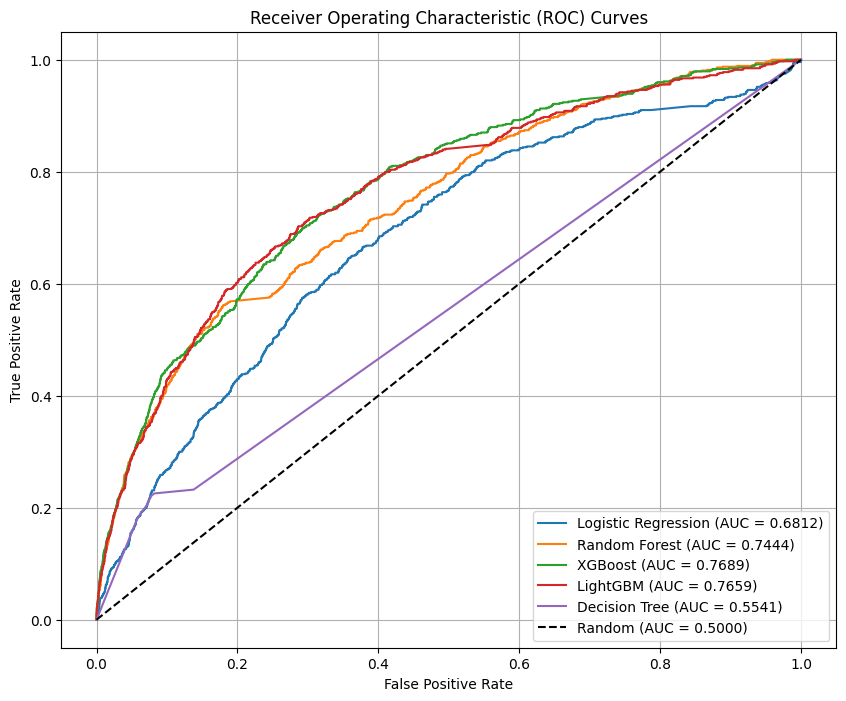


Plotting Feature Importances...


/tmp/ipython-input-2908033771.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette="viridis")


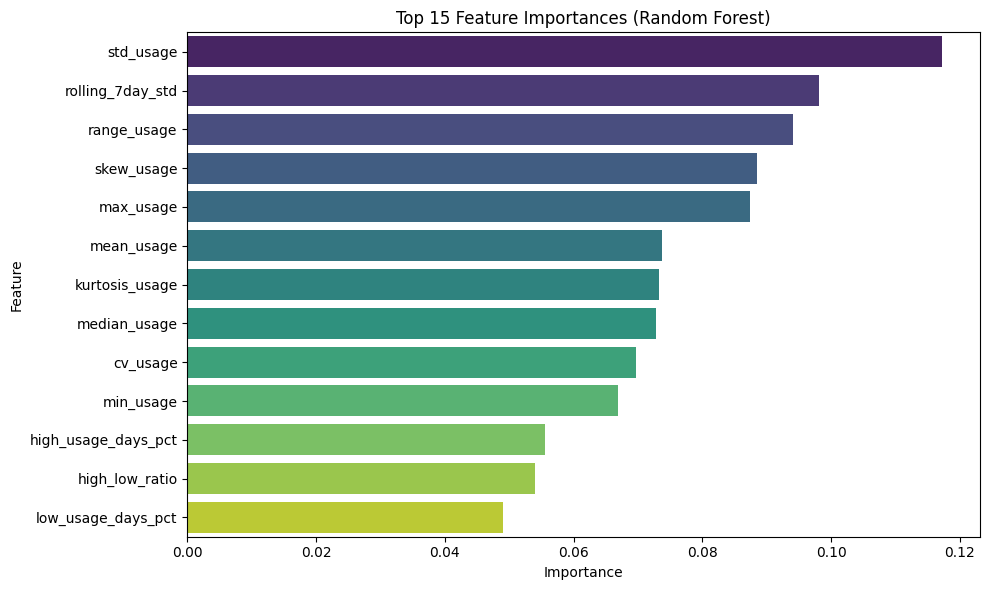

/tmp/ipython-input-2908033771.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette="viridis")


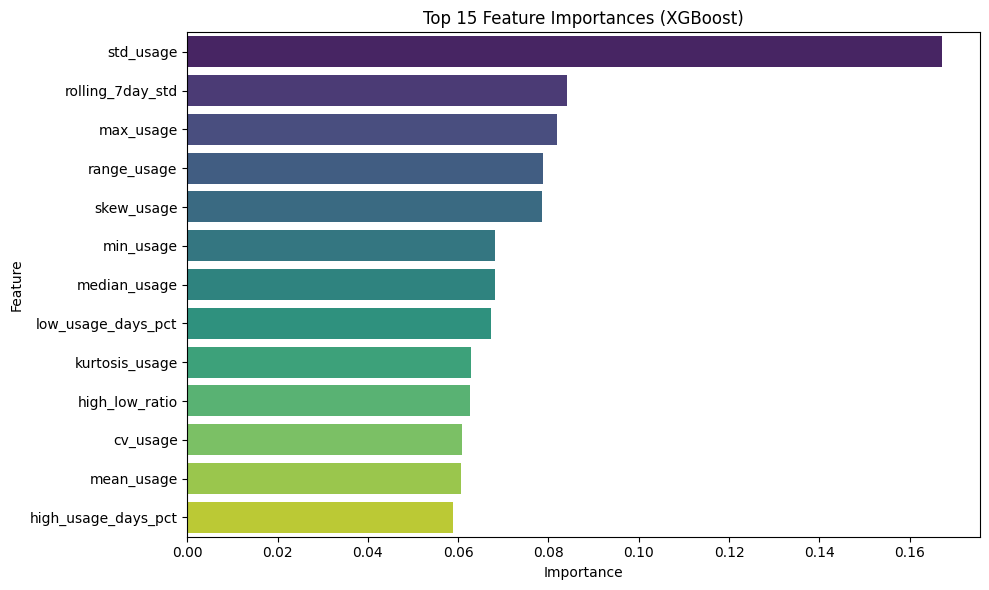

/tmp/ipython-input-2908033771.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette="viridis")


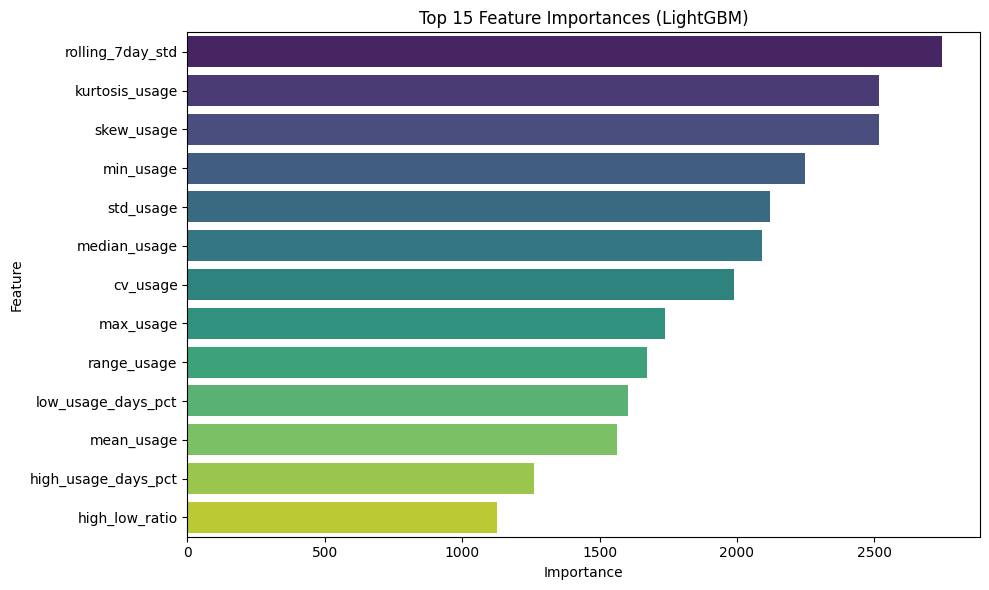

/tmp/ipython-input-2908033771.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette="viridis")


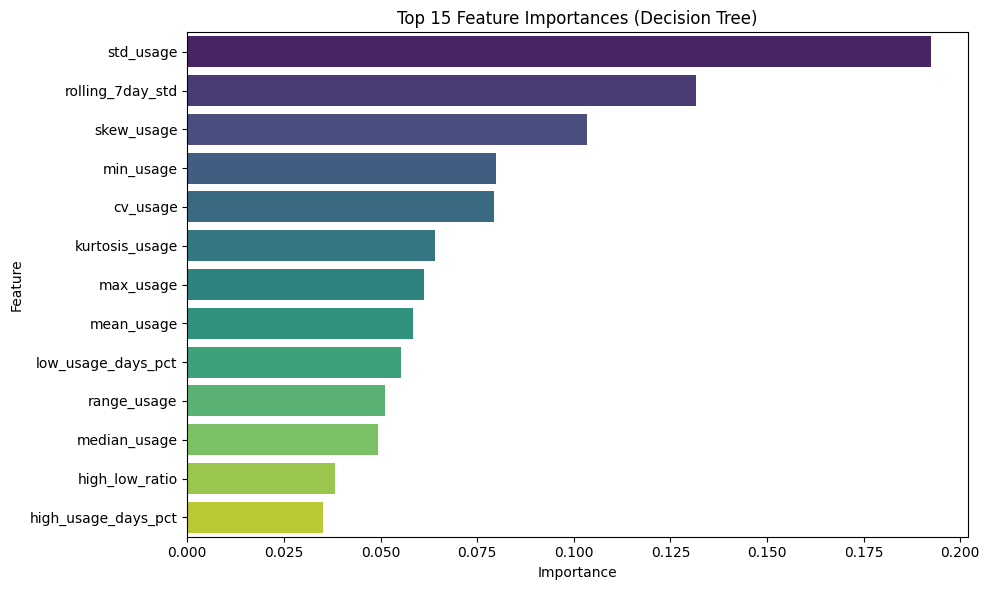

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# --- Plotting ROC Curves ---
print("Plotting ROC Curves...")
plt.figure(figsize=(10, 8))

# Dictionary of trained models
# Ensure these model objects (lr, rf, xgb, lgb, dt) are available in the environment
models_for_roc = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgb,
    "Decision Tree": dt
}

for name, model in models_for_roc.items():
    try:
        # Get predicted probabilities for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        # Calculate AUC
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    except AttributeError:
        print(f"Model {name} does not have predict_proba or an issue occurred.")
    except Exception as e:
        print(f"An error occurred while plotting ROC for {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)') # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Plotting Feature Importances (for tree-based models) ---
print("\nPlotting Feature Importances...")

# Dictionary of tree-based models
tree_models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgb,
    "Decision Tree": dt
}

for name, model in tree_models.items():
    try:
        # Get feature importances
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
             # For linear models like Logistic Regression, use coefficients (absolute value)
             # but we are only plotting tree-based models here.
             # If including linear models, you'd need to handle this.
             continue # Skip if no feature_importances_ attribute
        else:
            print(f"Model {name} does not have feature importances.")
            continue

        # Create a pandas Series for easy plotting
        feature_importances = pd.Series(importances, index=X_train.columns)

        # Sort importances and select top N (e.g., top 15)
        top_n = 15
        sorted_importances = feature_importances.sort_values(ascending=False).head(top_n)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette="viridis")
        plt.title(f"Top {top_n} Feature Importances ({name})")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred while plotting Feature Importances for {name}: {e}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = feature_df.drop(columns=['CONS_NO', 'FLAG'])
y = feature_df['FLAG']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and fit scaler on X_train (engineered features)
global scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nTrain class distribution:\n", y_train.value_counts(), "\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(), "\n", y_test.value_counts(normalize=True))

# Baseline accuracy if always predicting majority class
baseline_acc = y_train.value_counts(normalize=True).max()
print("\nBaseline accuracy if we always predict majority class:", baseline_acc)

Train shape: (33897, 13) Test shape: (8475, 13)

Train class distribution:
 FLAG
0    31005
1     2892
Name: count, dtype: int64 
 FLAG
0    0.914683
1    0.085317
Name: proportion, dtype: float64

Test class distribution:
 FLAG
0    7752
1     723
Name: count, dtype: int64 
 FLAG
0    0.91469
1    0.08531
Name: proportion, dtype: float64

Baseline accuracy if we always predict majority class: 0.9146827152845385


In [ ]:
def predict_new_consumers():
    try:
        new_df = pd.read_csv('new_users_data.csv')
        print("New users data loaded successfully.")
    except FileNotFoundError:
        print("Error: 'new_users_data.csv' not found. Please make sure the file exists.")
        return
    except Exception as e:
        print(f"An error occurred while loading new users data: {e}")
        return
    exclude_cols = ['CONS_NO', 'FLAG']
    new_time_cols = [col for col in new_df.columns if col not in exclude_cols]


    new_features = pd.DataFrame()
    new_features['CONS_NO'] = new_df['CONS_NO']

    # Statistical features
    new_features['mean_usage'] = new_df[new_time_cols].mean(axis=1)
    new_features['std_usage'] = new_df[new_time_cols].std(axis=1)
    new_features['min_usage'] = new_df[new_time_cols].min(axis=1)
    new_features['max_usage'] = new_df[new_time_cols].max(axis=1)
    new_features['median_usage'] = new_df[new_time_cols].median(axis=1)
    new_features['skew_usage'] = new_df[new_time_cols].skew(axis=1)
    new_features['kurtosis_usage'] = new_df[new_time_cols].kurtosis(axis=1)
    new_features['range_usage'] = new_features['max_usage'] - new_features['min_usage']
    new_features['cv_usage'] = new_features['std_usage'] / (new_features['mean_usage'] + 1e-9)

    # low_threshold and high_threshold are global variables from previous cells
    new_features['low_usage_days_pct'] = (new_df[new_time_cols] < low_threshold).sum(axis=1) / len(new_time_cols)
    new_features['high_usage_days_pct'] = (new_df[new_time_cols] > high_threshold).sum(axis=1) / len(new_time_cols)

    # Handle division by zero for high_low_ratio
    low_usage_for_ratio = new_features['low_usage_days_pct'].replace(0, np.nan)
    new_features['high_low_ratio'] = new_features['high_usage_days_pct'] / (low_usage_for_ratio + 1e-9)

    # Consumption volatility: rolling 7-day mean std
    # Apply rolling operation directly to new_df[new_time_cols]
    new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)

    # X_train.columns is a global variable from previous cells
    features_for_prediction = new_features[X_train.columns] # Ensure column order matches X_train
    scaled_features = scaler.transform(features_for_prediction)

    # Convert scaled_features back to a DataFrame to preserve feature names for LGBM
    scaled_features_df = pd.DataFrame(scaled_features, columns=X_train.columns)

    predictions = lgb.predict(scaled_features_df)

    print("\nPredicted Theft Status for New Consumers:")
    for i, cons_no in enumerate(new_features['CONS_NO']):
        status = "Electricity theft detected!!" if predictions[i] == 1 else "NO electricity theft detected."
        print(f"Consumer {cons_no}: {status}")

# Call the function to execute the prediction process for new users
predict_new_consumers()

New users data loaded successfully.

Predicted Theft Status for New Consumers:
Consumer NEW_CONS_0000: Electricity theft detected!!
Consumer NEW_CONS_0001: Electricity theft detected!!
Consumer NEW_CONS_0002: Electricity theft detected!!
Consumer NEW_CONS_0003: Electricity theft detected!!
Consumer NEW_CONS_0004: Electricity theft detected!!
Consumer NEW_CONS_0005: Electricity theft detected!!
Consumer NEW_CONS_0006: Electricity theft detected!!
Consumer NEW_CONS_0007: Electricity theft detected!!
Consumer NEW_CONS_0008: Electricity theft detected!!
Consumer NEW_CONS_0009: Electricity theft detected!!


/tmp/ipython-input-3801219090.py:43: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)


In [ ]:
def main_menu():
    while True:
        print("\n--- Main Menu ---")
        print("1. Check existing consumer")
        print("2. Simulate and Predict for New Users")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            check_consumer()
        elif choice == '2':
            predict_new_consumers()
        elif choice == '3':
            print("Exiting program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

# Execute the main menu to start the interactive program
main_menu()


--- Main Menu ---
1. Check existing consumer
2. Simulate and Predict for New Users
3. Exit
Enter your choice: 3
Exiting program. Goodbye!


In [ ]:
def simulate_and_predict_new_users(num_users=10, output_file="new_users_data.csv"):
    """
    Simulates new user data and then predicts their theft status.
    """
    print(f"\n--- Simulating and Predicting for {num_users} New Users ---")
    # Simulate new user data
    # Ensure the global df is used as reference for column names
    simulate_new_user_data(num_new_users=num_users, output_filename=output_file, df_reference=df)

    # Predict for the simulated new users
    predict_new_consumers()

# Call the new function to execute the simulation and prediction process
simulate_and_predict_new_users(num_users=10)


In [ ]:
import pandas as pd
import numpy as np

def simulate_new_user_data(num_new_users=10, output_filename="new_users_data.csv", df_reference=None):
    if df_reference is None:
        print("Warning: 'df_reference' not provided. Attempting to use global 'df' for column names.")
        if 'df' not in globals():
            raise ValueError("Reference DataFrame 'df' not found in global scope. Please pass 'df_reference'.")
        df_reference = df

    # Redefine time_cols by extracting it from the provided reference df
    meta_cols = ['CONS_NO', 'FLAG']
    time_cols = [col for col in df_reference.columns if col not in meta_cols]
    num_time_steps = len(time_cols)

    # Create a list of unique consumer numbers for the new users
    new_consumer_numbers = [f'NEW_CONS_{i:04d}' for i in range(num_new_users)]

    # Generate random daily readings for each new user
    # These readings are just for simulation purposes and may not reflect real-world patterns.
    # They are scaled to be somewhat similar to the original dataset's scaled values.
    np.random.seed(42)
    # Using a scale closer to the original scaled data distribution
    new_readings_data = np.random.randn(num_new_users, num_time_steps) * 0.5 + 0.0 # Simulating around mean 0, std 0.5

    # Create a DataFrame for the new users
    new_users_df = pd.DataFrame(new_readings_data, columns=time_cols)

    # Add the consumer numbers
    new_users_df.insert(0, 'CONS_NO', new_consumer_numbers)

    # Randomly assign a FLAG (0 or 1) to simulate known theft status for a more descriptive test
    new_users_df['FLAG'] = np.random.randint(0, 2, num_new_users)

    # Save the new data to a CSV file
    new_users_df.to_csv(output_filename, index=False)

    print(f"Simulated data for {num_new_users} new users saved to {output_filename}")
    display(new_users_df.head())
    return new_users_df

def predict_new_consumers():
    # 2. Load the 'new_users_data.csv' into a DataFrame
    try:
        new_df = pd.read_csv('new_users_data.csv')
        print("New users data loaded successfully.")
    except FileNotFoundError:
        print("Error: 'new_users_data.csv' not found. Please make sure the file exists.")
        return
    except Exception as e:
        print(f"An error occurred while loading new users data: {e}")
        return

    # 3. Identify the time-series columns in new_df
    exclude_cols = ['CONS_NO', 'FLAG']
    new_time_cols = [col for col in new_df.columns if col not in exclude_cols]

    # 4. Create a new DataFrame, new_features, to store engineered features
    new_features = pd.DataFrame()
    new_features['CONS_NO'] = new_df['CONS_NO']

    # 5. Calculate statistical features
    new_features['mean_usage'] = new_df[new_time_cols].mean(axis=1)
    new_features['std_usage'] = new_df[new_time_cols].std(axis=1)
    new_features['min_usage'] = new_df[new_time_cols].min(axis=1)
    new_features['max_usage'] = new_df[new_time_cols].max(axis=1)
    new_features['median_usage'] = new_df[new_time_cols].median(axis=1)
    new_features['skew_usage'] = new_df[new_time_cols].skew(axis=1)
    new_features['kurtosis_usage'] = new_df[new_time_cols].kurtosis(axis=1)
    new_features['range_usage'] = new_features['max_usage'] - new_features['min_usage']
    new_features['cv_usage'] = new_features['std_usage'] / (new_features['mean_usage'] + 1e-9)

    # 6. Calculate domain-specific features
    # low_threshold and high_threshold are global variables from previous cells
    new_features['low_usage_days_pct'] = (new_df[new_time_cols] < low_threshold).sum(axis=1) / len(new_time_cols)
    new_features['high_usage_days_pct'] = (new_df[new_time_cols] > high_threshold).sum(axis=1) / len(new_time_cols)

    # Handle division by zero for high_low_ratio
    low_usage_for_ratio = new_features['low_usage_days_pct'].replace(0, np.nan)
    new_features['high_low_ratio'] = new_features['high_usage_days_pct'] / (low_usage_for_ratio + 1e-9)

    # Consumption volatility: rolling 7-day mean std
    # Apply rolling operation directly to new_df[new_time_cols]
    new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)

    # 8. Select only the feature columns that were used for training
    # X_train.columns is a global variable from previous cells
    features_for_prediction = new_features[X_train.columns] # Ensure column order matches X_train

    # 9. Apply the pre-fitted scaler (StandardScaler)
    # scaler is a global variable from previous cells
    scaled_features = scaler.transform(features_for_prediction)

    # Convert scaled_features back to a DataFrame to preserve feature names for LGBM
    scaled_features_df = pd.DataFrame(scaled_features, columns=X_train.columns)

    # 10. Use the trained lgb model to predict the FLAG
    # lgb is a global variable from previous cells
    predictions = lgb.predict(scaled_features_df)

    # 11. Print the consumer IDs along with their predicted theft status
    print("\nPredicted Theft Status for New Consumers:")
    for i, cons_no in enumerate(new_features['CONS_NO']):
        status = "Electricity theft detected!!" if predictions[i] == 1 else "NO electricity theft detected."
        print(f"Consumer {cons_no}: {status}")

def simulate_and_predict_new_users(num_users=10, output_file="new_users_data.csv"):
    """
    Simulates new user data and then predicts their theft status.
    """
    print(f"\n--- Simulating and Predicting for {num_users} New Users ---")
    # Simulate new user data
    # Ensure the global df is used as reference for column names
    simulate_new_user_data(num_new_users=num_users, output_filename=output_file, df_reference=df)

    # Predict for the simulated new users
    predict_new_consumers()

# Call the new function to execute the simulation and prediction process
simulate_and_predict_new_users(num_users=10)



--- Simulating and Predicting for 10 New Users ---
Simulated data for 10 new users saved to new_users_data.csv


,CONS_NO,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
0,NEW_CONS_0000,0.248357,-0.069132,0.323844,0.761515,-0.117077,-0.117068,0.789606,0.383717,-0.234737,...,0.218162,0.019002,0.060016,0.306759,-0.511396,-0.128688,-0.834292,0.199612,0.323598,0
1,NEW_CONS_0001,-0.241593,0.786993,-0.612883,-0.732187,0.112226,0.523549,0.841964,-0.229442,0.539340,...,0.096795,0.425449,-0.068686,0.195232,-0.051611,0.132681,-0.291379,-1.219409,-0.067140,0
2,NEW_CONS_0002,0.711374,0.463108,0.482699,0.618065,0.044329,0.098658,-0.308826,-0.158036,0.307886,...,0.209805,-0.431941,0.639732,0.520862,0.291772,-0.064759,0.289929,-0.353446,0.427778,1
3,NEW_CONS_0003,0.824740,0.535305,-0.364801,0.180709,-0.646571,0.286195,0.225302,-0.934908,-0.580892,...,0.899363,-0.367601,0.828104,-0.121531,0.001144,0.535183,0.635946,-0.055406,-0.194122,0
4,NEW_CONS_0004,-0.027960,0.168979,0.445652,0.002115,0.309443,0.819180,0.190655,0.155826,-0.759455,...,-1.037320,-0.045978,0.008013,0.397300,0.486811,-0.251785,-0.075307,-0.383060,-0.564031,0


New users data loaded successfully.

Predicted Theft Status for New Consumers:
Consumer NEW_CONS_0000: Electricity theft detected!!
Consumer NEW_CONS_0001: Electricity theft detected!!
Consumer NEW_CONS_0002: Electricity theft detected!!
Consumer NEW_CONS_0003: Electricity theft detected!!
Consumer NEW_CONS_0004: Electricity theft detected!!
Consumer NEW_CONS_0005: NO electricity theft detected.
Consumer NEW_CONS_0006: NO electricity theft detected.
Consumer NEW_CONS_0007: Electricity theft detected!!
Consumer NEW_CONS_0008: Electricity theft detected!!
Consumer NEW_CONS_0009: Electricity theft detected!!


/tmp/ipython-input-3623540828.py:97: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)


In [ ]:
def main_menu():
    while True:
        print("\n--- Main Menu ---")
        print("1. Check existing consumer")
        print("2. Simulate and Predict for New Users")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            check_consumer()
        elif choice == '2':
            # Call the new function to execute the simulation and prediction process
            simulate_and_predict_new_users(num_users=10)
        elif choice == '3':
            print("Exiting program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

# Execute the main menu to start the interactive program
main_menu()


--- Main Menu ---
1. Check existing consumer
2. Simulate and Predict for New Users
3. Exit

--- Simulating and Predicting for 10 New Users ---
Simulated data for 10 new users saved to new_users_data.csv


,CONS_NO,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
0,NEW_CONS_0000,0.248357,-0.069132,0.323844,0.761515,-0.117077,-0.117068,0.789606,0.383717,-0.234737,...,0.218162,0.019002,0.060016,0.306759,-0.511396,-0.128688,-0.834292,0.199612,0.323598,0
1,NEW_CONS_0001,-0.241593,0.786993,-0.612883,-0.732187,0.112226,0.523549,0.841964,-0.229442,0.539340,...,0.096795,0.425449,-0.068686,0.195232,-0.051611,0.132681,-0.291379,-1.219409,-0.067140,0
2,NEW_CONS_0002,0.711374,0.463108,0.482699,0.618065,0.044329,0.098658,-0.308826,-0.158036,0.307886,...,0.209805,-0.431941,0.639732,0.520862,0.291772,-0.064759,0.289929,-0.353446,0.427778,1
3,NEW_CONS_0003,0.824740,0.535305,-0.364801,0.180709,-0.646571,0.286195,0.225302,-0.934908,-0.580892,...,0.899363,-0.367601,0.828104,-0.121531,0.001144,0.535183,0.635946,-0.055406,-0.194122,0
4,NEW_CONS_0004,-0.027960,0.168979,0.445652,0.002115,0.309443,0.819180,0.190655,0.155826,-0.759455,...,-1.037320,-0.045978,0.008013,0.397300,0.486811,-0.251785,-0.075307,-0.383060,-0.564031,0


/tmp/ipython-input-3623540828.py:97: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)


New users data loaded successfully.

Predicted Theft Status for New Consumers:
Consumer NEW_CONS_0000: Electricity theft detected!!
Consumer NEW_CONS_0001: Electricity theft detected!!
Consumer NEW_CONS_0002: Electricity theft detected!!
Consumer NEW_CONS_0003: Electricity theft detected!!
Consumer NEW_CONS_0004: Electricity theft detected!!
Consumer NEW_CONS_0005: NO electricity theft detected.
Consumer NEW_CONS_0006: NO electricity theft detected.
Consumer NEW_CONS_0007: Electricity theft detected!!
Consumer NEW_CONS_0008: Electricity theft detected!!
Consumer NEW_CONS_0009: Electricity theft detected!!

--- Main Menu ---
1. Check existing consumer
2. Simulate and Predict for New Users
3. Exit

--- Simulating and Predicting for 10 New Users ---
Simulated data for 10 new users saved to new_users_data.csv


,CONS_NO,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
0,NEW_CONS_0000,0.248357,-0.069132,0.323844,0.761515,-0.117077,-0.117068,0.789606,0.383717,-0.234737,...,0.218162,0.019002,0.060016,0.306759,-0.511396,-0.128688,-0.834292,0.199612,0.323598,0
1,NEW_CONS_0001,-0.241593,0.786993,-0.612883,-0.732187,0.112226,0.523549,0.841964,-0.229442,0.539340,...,0.096795,0.425449,-0.068686,0.195232,-0.051611,0.132681,-0.291379,-1.219409,-0.067140,0
2,NEW_CONS_0002,0.711374,0.463108,0.482699,0.618065,0.044329,0.098658,-0.308826,-0.158036,0.307886,...,0.209805,-0.431941,0.639732,0.520862,0.291772,-0.064759,0.289929,-0.353446,0.427778,1
3,NEW_CONS_0003,0.824740,0.535305,-0.364801,0.180709,-0.646571,0.286195,0.225302,-0.934908,-0.580892,...,0.899363,-0.367601,0.828104,-0.121531,0.001144,0.535183,0.635946,-0.055406,-0.194122,0
4,NEW_CONS_0004,-0.027960,0.168979,0.445652,0.002115,0.309443,0.819180,0.190655,0.155826,-0.759455,...,-1.037320,-0.045978,0.008013,0.397300,0.486811,-0.251785,-0.075307,-0.383060,-0.564031,0


/tmp/ipython-input-3623540828.py:97: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)


New users data loaded successfully.

Predicted Theft Status for New Consumers:
Consumer NEW_CONS_0000: Electricity theft detected!!
Consumer NEW_CONS_0001: Electricity theft detected!!
Consumer NEW_CONS_0002: Electricity theft detected!!
Consumer NEW_CONS_0003: Electricity theft detected!!
Consumer NEW_CONS_0004: Electricity theft detected!!
Consumer NEW_CONS_0005: NO electricity theft detected.
Consumer NEW_CONS_0006: NO electricity theft detected.
Consumer NEW_CONS_0007: Electricity theft detected!!
Consumer NEW_CONS_0008: Electricity theft detected!!
Consumer NEW_CONS_0009: Electricity theft detected!!

--- Main Menu ---
1. Check existing consumer
2. Simulate and Predict for New Users
3. Exit

--- Simulating and Predicting for 10 New Users ---
Simulated data for 10 new users saved to new_users_data.csv


,CONS_NO,1/1/2014,1/2/2014,1/3/2014,1/4/2014,1/5/2014,1/6/2014,1/7/2014,1/8/2014,1/9/2014,...,10/23/2016,10/24/2016,10/25/2016,10/26/2016,10/27/2016,10/28/2016,10/29/2016,10/30/2016,10/31/2016,FLAG
0,NEW_CONS_0000,0.248357,-0.069132,0.323844,0.761515,-0.117077,-0.117068,0.789606,0.383717,-0.234737,...,0.218162,0.019002,0.060016,0.306759,-0.511396,-0.128688,-0.834292,0.199612,0.323598,0
1,NEW_CONS_0001,-0.241593,0.786993,-0.612883,-0.732187,0.112226,0.523549,0.841964,-0.229442,0.539340,...,0.096795,0.425449,-0.068686,0.195232,-0.051611,0.132681,-0.291379,-1.219409,-0.067140,0
2,NEW_CONS_0002,0.711374,0.463108,0.482699,0.618065,0.044329,0.098658,-0.308826,-0.158036,0.307886,...,0.209805,-0.431941,0.639732,0.520862,0.291772,-0.064759,0.289929,-0.353446,0.427778,1
3,NEW_CONS_0003,0.824740,0.535305,-0.364801,0.180709,-0.646571,0.286195,0.225302,-0.934908,-0.580892,...,0.899363,-0.367601,0.828104,-0.121531,0.001144,0.535183,0.635946,-0.055406,-0.194122,0
4,NEW_CONS_0004,-0.027960,0.168979,0.445652,0.002115,0.309443,0.819180,0.190655,0.155826,-0.759455,...,-1.037320,-0.045978,0.008013,0.397300,0.486811,-0.251785,-0.075307,-0.383060,-0.564031,0


/tmp/ipython-input-3623540828.py:97: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  new_features['rolling_7day_std'] = new_df[new_time_cols].rolling(window=7, axis=1).std().mean(axis=1)


New users data loaded successfully.

Predicted Theft Status for New Consumers:
Consumer NEW_CONS_0000: Electricity theft detected!!
Consumer NEW_CONS_0001: Electricity theft detected!!
Consumer NEW_CONS_0002: Electricity theft detected!!
Consumer NEW_CONS_0003: Electricity theft detected!!
Consumer NEW_CONS_0004: Electricity theft detected!!
Consumer NEW_CONS_0005: NO electricity theft detected.
Consumer NEW_CONS_0006: NO electricity theft detected.
Consumer NEW_CONS_0007: Electricity theft detected!!
Consumer NEW_CONS_0008: Electricity theft detected!!
Consumer NEW_CONS_0009: Electricity theft detected!!

--- Main Menu ---
1. Check existing consumer
2. Simulate and Predict for New Users
3. Exit
